## CSCS530 Winter 2015
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

#### [View this repository on NBViewer](http://nbviewer.ipython.org/github/mjbommar/cscs-530-w2015/tree/master/)


# Basic Grid

 In this notebook, we'll explore one of the most common types of environment - a grid. In this case, we'll be creating __a two-dimension (2D) square grid__.  It's important to remember that grids can take other forms, including:
 * _one-dimensional_
 * _three-dimensional_
 * _hexagonal_
 * _triangular_
 
 2D grids are the simple to implement and understand, and they are a very common choice for real-world spatial models.  Let's begin by importing some libraries and exploring how a grid works.
 
 ### Imports

 The imports below provide us with:
  * numpy: numerical python utilities, including multi-dimensional arrays/matrices
  * matplotlib.pyplot: plotting library
  
 In addition, the ``%matplotlib inline`` statement ensures that our plots are visible in ipython.

In [5]:
%matplotlib inline
# Imports
import numpy
import matplotlib.pyplot as plt

import seaborn; seaborn.set()

## Grids terminology and notation

  Before we begin, it's important to agree our terminology and notation down.  Below are some grid terms that we'll be using:
  
  * cell: a region of the grid bounded by sides that can be identified by a position
  * lattice: synonym for grid (specially, integer lattice)
  * neighbors: cells that are adjacent to a given reference cell
  * [Moore neighborhood](http://en.wikipedia.org/wiki/Moore_neighborhood): a definition of cell adjacency that includes all touching cells
    ![Moore neighbordhood](http://upload.wikimedia.org/wikipedia/en/thumb/4/41/Moore_d.gif/220px-Moore_d.gif)


  * [von Neumann neighborhood](http://en.wikipedia.org/wiki/Von_Neumann_neighborhood): a definition of cell adjacency that includes only unit-distance cells, i.e., along cardinal directions
    ![von Neumann neighborhood](http://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Vierer-Nachbarschaft.png/220px-Vierer-Nachbarschaft.png)
    
    
  * [Manhattan distance](http://en.wikipedia.org/wiki/Taxicab_geometry): also known as taxicab or $\ell_1$ distance, Manhattan distance is the metric used in calculating von Neumann neighborhoods

## Grids with Numerical Values

  Now that we know how to refer to elements of our grid, let's see the most common way to store and display grids with numerical values.  These are grids whose cells store a numerical value, e.g., :
  
  * integer ID of an agent; e.g., cell (3,4) contains agent #17
  * integer population size; e.g., number of people living in a certain neighborhood
  * decimal quantity; e.g., mass of vegetation per square meter
  
  To store this information, we can use ``numpy.array`` objects.  To brush up on arrays, you might review the following links:

  * [Numpy basics](http://docs.scipy.org/doc/numpy/user/basics.html)
  * [Numpy tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)

### Creating an empty array

  To start, let's see how to create an empty array.  We can do this in a number of ways, including:
  
  * __NaN__: create an array whose cells are filled with NaN ("not-a-number")
  * __zero__: create an array whose cells are filled with zeros
  
  Depending on the interpretation of cell values, your appropriate choice may vary.

#### Creating an empty array: NaN

In [11]:
# Set the grid size
grid_size = 5

# Create the grid
space = numpy.full((grid_size, grid_size), numpy.nan)
print(space)

[[ nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan]]


#### Creating an empty array: zero

In [16]:
# Set the grid size
grid_size = 5

# Create the grid
space = numpy.zeros((grid_size, grid_size))
print(space)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


#### Visualizing our grid

  Our next step should be to visualize the grid in a more scalable fashion than reviewing the full array of cell values.  Instead, we can visualize the grid in a form that allows our visual cortex to provide context and characterization.
  
  Let's start by visualizing our "zero-d" space using the ``matplotlib.pyplot`` method [``pcolor``](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolor).

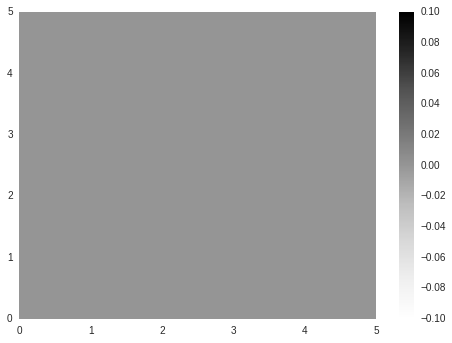

In [17]:
# Now show the space
plt.figure()
plt.pcolor(space, snap=True)
plt.colorbar()

  Of course, since this is an "empty" grid with no values, we don't see much.  Let's manually set one of the cells from 0 to 1 and plot again.

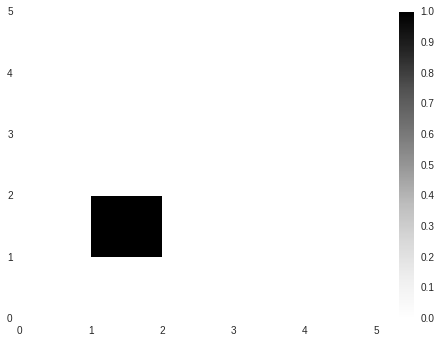

In [18]:
# Change cell (1,1)'s value to 1
space[1, 1] = 1

# Now show the space
plt.figure()
plt.pcolor(space, snap=True)
plt.colorbar()

There are two things to note:

 * cell ``(1,1)`` corresponds to the __second__ row and __second__ column in the grid because we are using [__zero-indexing__](http://en.wikipedia.org/wiki/Zero-based_numbering)
 * ``(0, 0)`` is in the lower left corner for this visualization; __not all visualizations may choose this orientation!__  For example, many follow a convention like words on a page, with (0, 0) in the upper left corner

### Initializing a grid with random values

Grids are commonly setup with initial conditions, including:
  
  * endowments of timber or other resources
  * populations per square mile or other densities
  * agent positions
  
  Let's walk through creating a grid that represents the binary presence of a resource.  Our parameters are as follows:
  
  * __``grid_size``__: "dimension" of the grid, i.e., number of cells in each row or column
  * __``num_cells``__: number of cells to sample for resource endowment
  
In order to determine which cells to endow, we'll need to sample from a random distribution.  If you haven't already, now would be a great time to review the __Basic Distributions__ notebook in the ``basic-random`` folder.  We'll make the following assertions for our spatial distribution of resource:
  
  
  * the __row__ coordinate will be uniformly distributed across the entire discrete grid
  * the __column__ coordinate will be uniformly distributed across the entire discrete grid
  * the __row__ and __column__ coordinates will be drawn __independently__ from each other

Endowing cell (4, 20).
Endowing cell (5, 16).
Endowing cell (2, 16).
Endowing cell (5, 11).
Endowing cell (1, 14).
Endowing cell (5, 10).
Endowing cell (12, 0).
Endowing cell (6, 5).
Endowing cell (19, 15).
Endowing cell (15, 12).


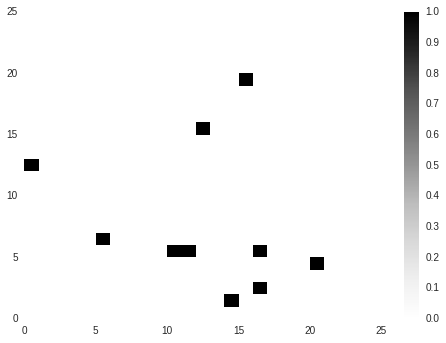

In [20]:
# Set the grid and cell parameters
grid_size = 25
num_cells = 10

# Create the space and activate random cells
space = numpy.zeros((grid_size, grid_size))

# Now sample the agents.
for cell_id in range(num_cells):
    # Sample random position
    row = numpy.random.randint(0, grid_size)
    col = numpy.random.randint(0, grid_size)
    
    # "Endow" the cell with the resource by setting its value to 1.
    space[row, col] = 1
    
    # Output some info about the agent.
    print("Endowing cell ({0}, {1}).".format(row, col))

# Now show the space
plt.figure()
plt.pcolor(space, snap=True)
plt.colorbar()

## What have we done?

  You should now see a small grid with blank background and a number of endowed cells.
  
### Questions

 1. Are we guaranteed to always have ``num_cells`` cells with endowment?  Why or why not?
 2. How can the spatial distribution be characterized?

## Slightly more complicated example

  Let's try a slightly more complicated example by making the following complications:
  
  * Choose a more interesting spatial distribution.
  * Represent the __quantity__, not just presence, of a resource

Endowing cell (13, 11).
Endowing cell (13, 12).
Endowing cell (13, 13).
Endowing cell (12, 12).
Endowing cell (10, 14).
Endowing cell (12, 12).
Endowing cell (11, 13).
Endowing cell (11, 13).
Endowing cell (13, 12).
Endowing cell (12, 12).


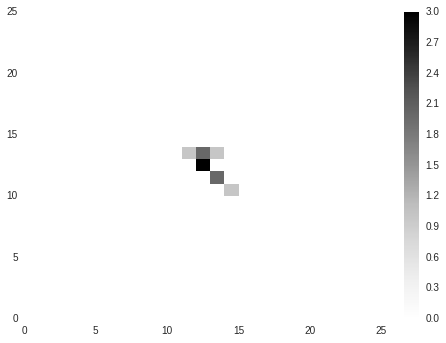

In [21]:
# Set the grid and agent parameters
grid_size = 25
num_cells = 10
spread = 1

# Create the space and activate random cells
space = numpy.zeros((grid_size, grid_size))

# Now sample the agents.
for cell_id in range(num_cells):
    # Sample random position
    row = int(numpy.random.normal((grid_size) / 2.0, spread))
    col = int(numpy.random.normal((grid_size) / 2.0, spread))

    # "Activate" the cell by setting its value to 1.
    space[row, col] += 1
    
    # Output some info about the agent.
    print("Endowing cell ({0}, {1}).".format(row, col))

# Now show the space
f = plt.figure()
plt.pcolor(space, snap=True)
plt.colorbar()

## What have we done (this time)?

  You should now see a small grid with blank background and a number of endowed cells.  Unlike the previous example, the _intensity of these cells should vary with the quantity of resource that has been placed_.

### Questions

 1. How can the spatial distribution be characterized?  How does the ``spread`` parameter come into play?
 2. What is the range of possible values for cell quantities?

## Interactive plotting

  Next, let's create an interactive widget that helps us understand how the spread parameter affects the grid's initial conditions.  In the code below, we wrap our example above in a method labeled ``gaussian_initial_grid``, which we then call via the ``interact`` method.
  
  When you run the code, perform the following visual "experiments":
  
  * Fixing ``num_cells`` and ``spread``, vary ``grid_size``.  Does the qualitative character of the initial conditions change?
  * Fixing ``grid_size`` and ``spread``, vary ``num_cells``.  Does the qualitative character of the initial conditions change?
  * Fixing ``num_cells`` and ``grid_size``, vary ``spread``.  Does the qualitative character of the initial conditions change?

<function __main__.gaussian_initial_grid>

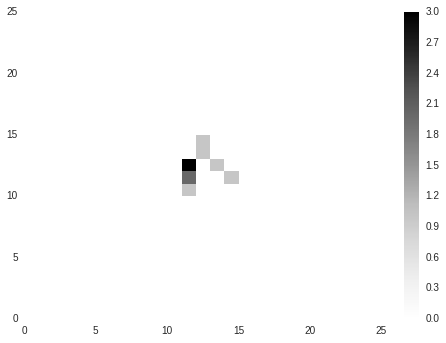

In [34]:
# First, we'll wrap our experiments above in a method that takes as input our grid parameters.
def gaussian_initial_grid(grid_size=25, num_cells=10, spread=1):
    """
    Create an initial 2D grid with Gaussian/normal-distributed cells.
    """
    # Create the space and activate random cells
    space = numpy.zeros((grid_size, grid_size))

    # Now sample the agents.
    for cell_id in range(num_cells):
        # Sample random position
        row = int(numpy.random.normal((grid_size) / 2.0, spread))
        col = int(numpy.random.normal((grid_size) / 2.0, spread))

        # "Activate" the cell by setting its value to 1.
        space[row, col] += 1

    # Now show the space
    f = plt.figure()
    plt.pcolor(space, snap=True)
    plt.colorbar()

# Import widget methods
from IPython.html.widgets import interact, fixed

interact(gaussian_initial_grid, grid_size=(5, 100),
         num_cells = (1, 500),
         spread=(1, 100))

## Boundaries

  If all went as planned, in your third experiment with ``spread``, you should have generated an error.  This particular error is called an __IndexError__, because it occured when we tried to access or index a cell that did not exist in our space.
  
  For example, if we have a (10, 10) grid, there are no cells with the label (27, 4) or (-15, 8).  However, based on our method for sampling the resource positions, there is some non-zero probability that we will try these cells.
  
  This is an example of __boundary__ in space. There are a number of approaches to addressing it:
  
  * change assumptions about distributions or dynamics so that the environment terminates; for example, we could:
      * clump all resources up at the edges; for example, if we drew ``-4`` as a column, place the resource instead in column 0
      * change to a distribution that allows for bounded support, i.e., a uniform distribution or truncated normal
  * __wrap__ cells around the boundary, similar to a torus or sphere; for example, if we drew ``-1`` as a column, we would wrap all the way around to the last column and place the resource there instead.
  
  In the example below, we'll go with the ``wrapping`` or torus approach.  To obtain the desired effect, we'll use the [__modulo__ operator ``%``](http://en.wikipedia.org/wiki/Modulo_operation).

<function __main__.gaussian_initial_grid>

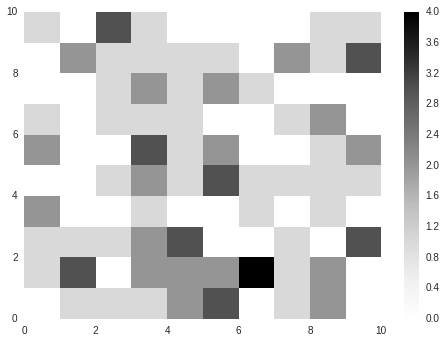

In [42]:
# First, we'll wrap our experiments above in a method that takes as input our grid parameters.
def gaussian_initial_grid(grid_size=10, num_cells=100, spread=4):
    """
    Create an initial 2D grid with Gaussian/normal-distributed cells with wrapping.
    """
    # Create the space and activate random cells
    space = numpy.zeros((grid_size, grid_size))

    # Now sample the agents.
    for cell_id in range(num_cells):
        # Sample random position
        row = int(numpy.random.normal((grid_size) / 2.0, spread)) % grid_size
        col = int(numpy.random.normal((grid_size) / 2.0, spread)) % grid_size

        # "Activate" the cell by setting its value to 1.
        space[row, col] += 1

    # Now show the space
    f = plt.figure()
    plt.pcolor(space, snap=True)
    plt.colorbar()

# Import widget methods
from IPython.html.widgets import interact, fixed

interact(gaussian_initial_grid, grid_size=(5, 100),
         num_cells = (1, 500),
         spread=(1, 100))